# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [4]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
sample_n(cars, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [7]:
library(tidyverse)

# Load the data
cars <- read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# Create dataset with only Honda Accords
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

# Peek at the filtered data
head(accords)

# Fit the regression model: price ~ mileage
fit <- lm(price ~ mileage, data = accords)

# Print the regression summary
summary(fit)


Rows: 1286 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): type, make, model, trim
dbl (3): year, mileage, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,make,model,trim,mileage,price
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
USED,2007,Honda,Accord,EX-L V-6,96715,12950
USED,2006,Honda,Accord,EX V-6,102644,10998
USED,2005,Honda,Accord,LX,111639,7688
USED,2001,Honda,Accord,EX,103771,5788
USED,2004,Honda,Accord,EX,179819,7988
USED,2008,Honda,Accord,EX-L V-6,39029,16998



Call:
lm(formula = price ~ mileage, data = accords)

Residuals:
   Min     1Q Median     3Q    Max 
 -7528  -1330    -68   1226   7989 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 20675.6746   399.4744    51.8 <0.0000000000000002 ***
mileage        -0.0878     0.0047   -18.7 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2420 on 120 degrees of freedom
Multiple R-squared:  0.744,	Adjusted R-squared:  0.742 
F-statistic:  349 on 1 and 120 DF,  p-value: <0.0000000000000002



---

The value of $\hat{\beta}_0$ with units:

Interpretation:

---

The value of $\hat{\beta}_1$ with units:

Interpretation:

---

The value of $\text{se}({\hat{\beta}_0})$ with units:

Interpretation:

---

The value of $\text{se}({\hat{\beta}_1})$ with units:

Interpretation:

---

The value of $\hat{\sigma}$ with units:

Interpretation:

---

The value of $\text{R}^2$ with units:

Interpretation:

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [8]:
# Predict average price at mileage = 50000
new_data <- data.frame(mileage = 50000)

predict(fit, newdata = new_data, interval = "confidence")


,fit,lwr,upr
1,16285,15809,16761


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [9]:
# Your code here!
predict(fit, newdata = data.frame(mileage = 300000), interval = "confidence")



,fit,lwr,upr
1,-5667,-7842,-3492


---

Write your answer to Exercise 3 here.


---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


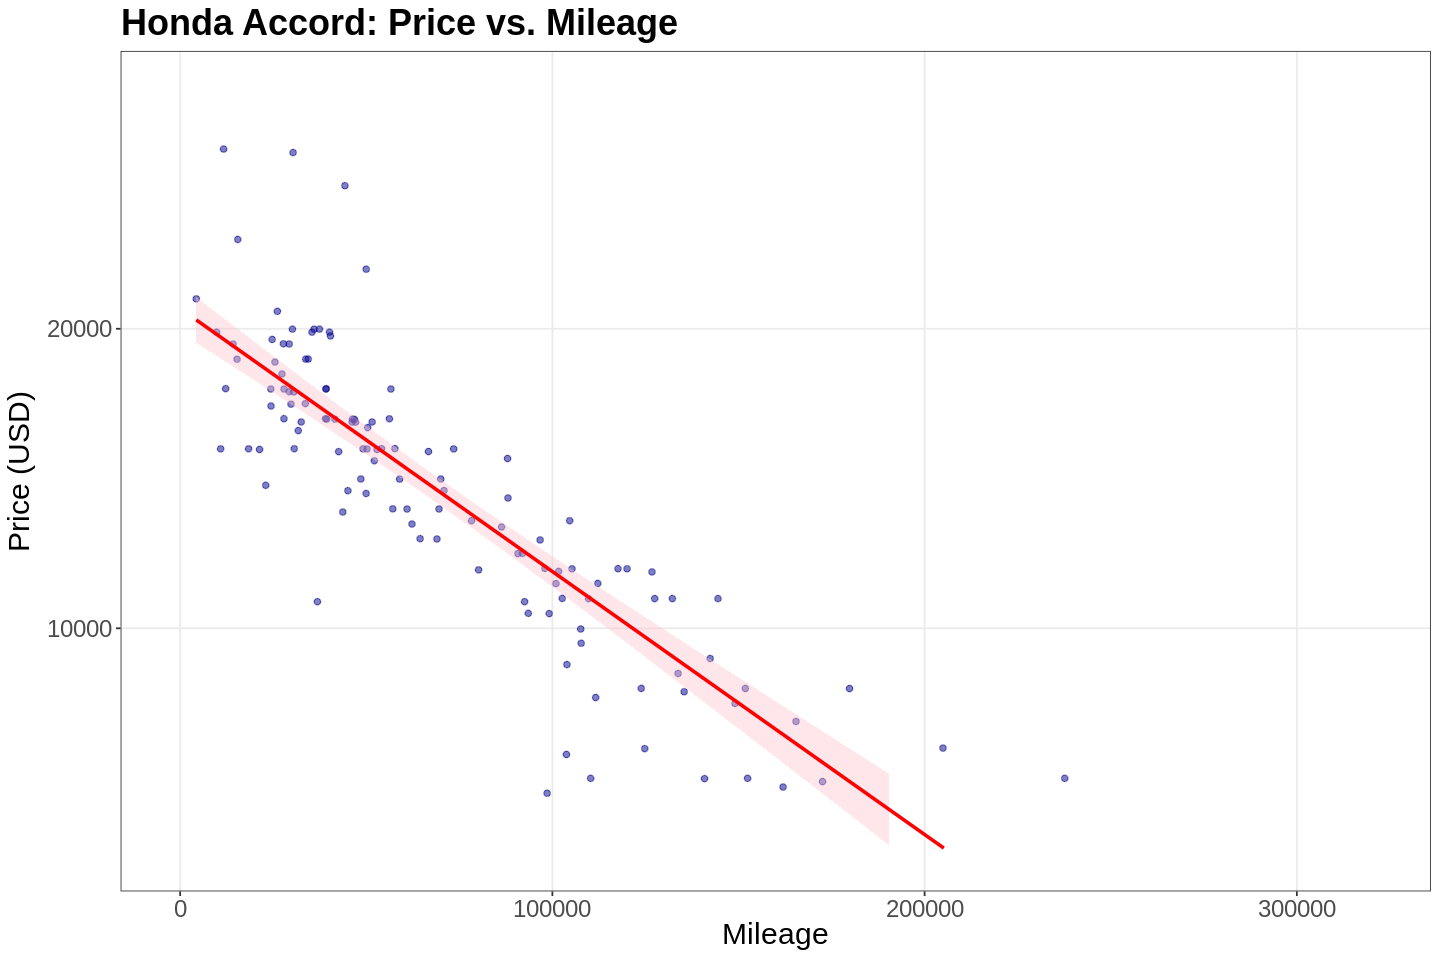

In [10]:
# Your code here
library(ggplot2)
library(tidyverse)

# Filter Honda Accords (same as before)
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

# Create the plot
ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red", fill = "pink") +
  labs(
    title = "Honda Accord: Price vs. Mileage",
    x = "Mileage",
    y = "Price (USD)"
  ) +
  # Extend limits so we can see the faulty 300,000-mile prediction
  xlim(0, 320000) +
  ylim(min(accords$price) - 2000, max(accords$price) + 2000) +
  theme_bw() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )




## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [12]:
# Your answer here!
library(tidyverse)

# Filter Honda Accords
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

# Fit model with log-transformed outcome
fit_log <- lm(log(price) ~ mileage, data = accords)

summary(fit_log)

# Create new data points
new_points <- data.frame(mileage = c(50000, 300000))

# Predict on log scale, then exponentiate back to dollars
pred_log <- predict(fit_log, newdata = new_points, type = "response")

# Convert from log(price) to price in dollars
pred_price <- exp(pred_log)

# Print predictions
pred_price




Call:
lm(formula = log(price) ~ mileage, data = accords)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8967 -0.0630  0.0242  0.1038  0.4111 

Coefficients:
               Estimate  Std. Error t value            Pr(>|t|)    
(Intercept) 10.03250583  0.03315092   302.6 <0.0000000000000002 ***
mileage     -0.00000736  0.00000039   -18.9 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.201 on 120 degrees of freedom
Multiple R-squared:  0.748,	Adjusted R-squared:  0.746 
F-statistic:  356 on 1 and 120 DF,  p-value: <0.0000000000000002


1     2 
15746  2499

## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


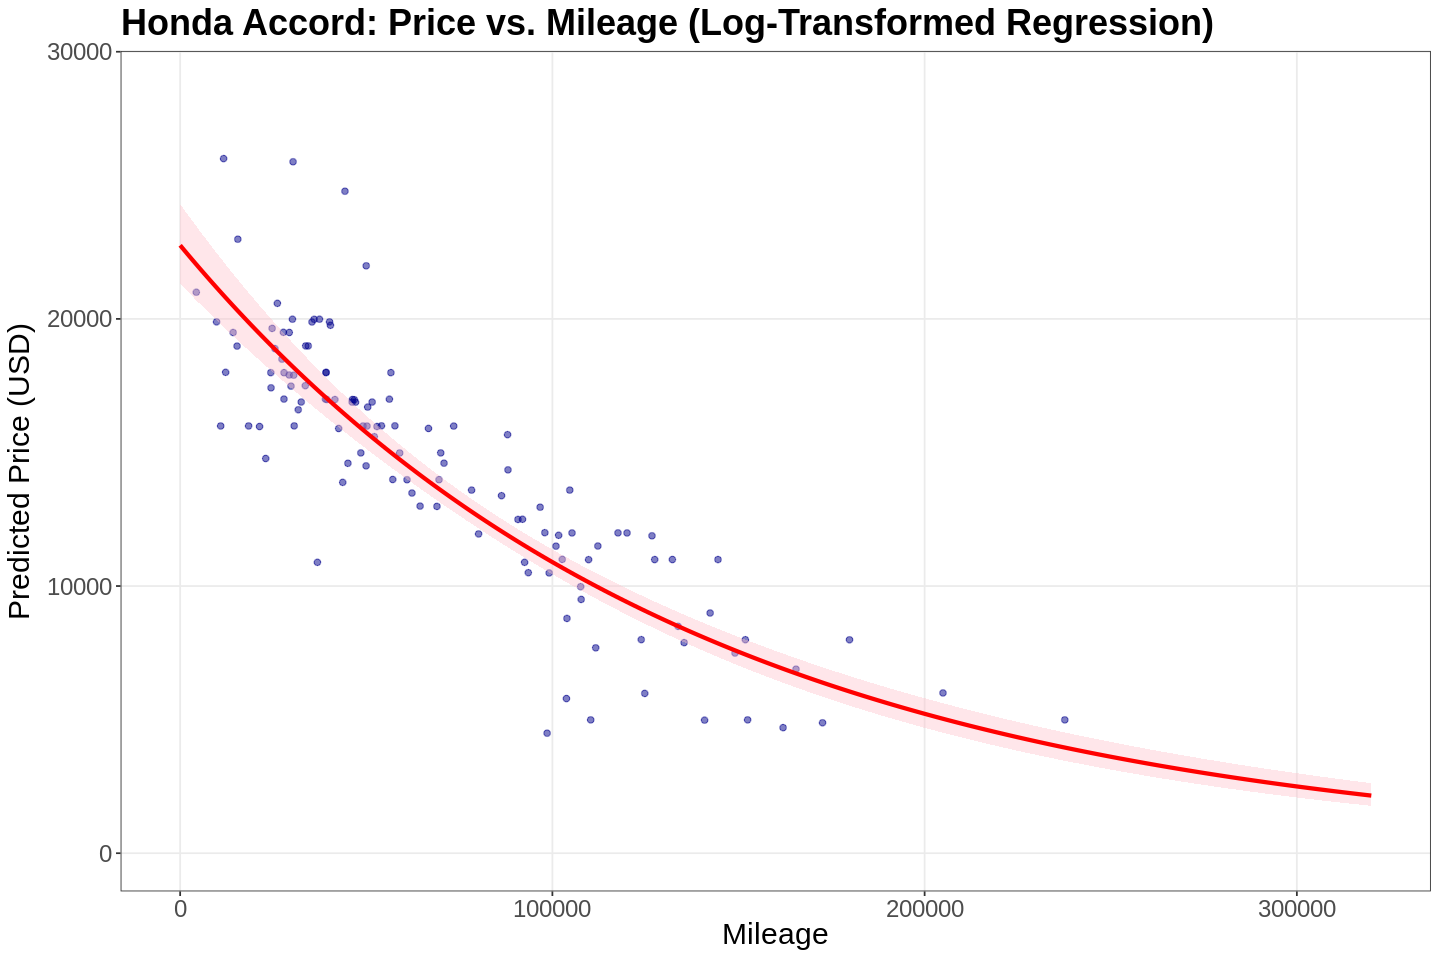

In [14]:
# Your code here!
library(ggplot2)
library(tidyverse)

# Filter Honda Accords
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

# Fit the log-linear model again
fit_log <- lm(log(price) ~ mileage, data = accords)

# Make a sequence of mileage values to produce smooth predictions
mileage_seq <- data.frame(mileage = seq(0, 320000, by = 1000))

# Predict log(price) + confidence intervals
pred_log <- predict(fit_log, newdata = mileage_seq, interval = "confidence")

# Convert to price scale
pred <- exp(pred_log)
pred_df <- cbind(mileage_seq, pred)
colnames(pred_df) <- c("mileage", "fit", "lwr", "upr")

# Plot
ggplot() +
  geom_point(data = accords, aes(x = mileage, y = price),
             alpha = 0.5, color = "darkblue") +

  # Confidence band
  geom_ribbon(data = pred_df,
              aes(x = mileage, ymin = lwr, ymax = upr),
              fill = "pink", alpha = 0.4) +

  # Fitted curve
  geom_line(data = pred_df,
            aes(x = mileage, y = fit),
            color = "red", size = 1.2) +

  labs(
    title = "Honda Accord: Price vs. Mileage (Log-Transformed Regression)",
    x = "Mileage",
    y = "Predicted Price (USD)"
  ) +

  xlim(0, 320000) +
  ylim(0, max(accords$price) * 1.1) +

  theme_bw() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )



## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [15]:
# Your code here!

# Fit the log-transformed model again (if not already loaded)
fit_log <- lm(log(price) ~ mileage, data = accords)

# Extract coefficients
b0 <- coef(fit_log)[1]     # Intercept (log scale)
b1 <- coef(fit_log)[2]     # Slope (log scale)

# 1. exp(beta_0)
exp_b0 <- exp(b0)

# 2. exp(beta_1)
exp_b1 <- exp(b1)

# 3. R-squared
r2 <- summary(fit_log)$r.squared

# 4. Effect of 10,000 miles: exp(10000 * beta_1)
exp_10000 <- exp(10000 * b1)

# Print results
cat("exp(beta_0):", exp_b0, "\n")
cat("exp(beta_1):", exp_b1, "\n")
cat("R^2:", r2, "\n")
cat("exp(10000 * beta_1):", exp_10000, "\n")


exp(beta_0): 22754 
exp(beta_1): 1 
R^2: 0.748 
exp(10000 * beta_1): 0.929 



---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation:

---

The value of $\text{R}^2$ with units:

Interpretation:

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [16]:
# Your code here!

library(tidyverse)

# Filter Honda Accords
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

# Fit log-linear regression with mileage + year
fit_log2 <- lm(log(price) ~ mileage + year, data = accords)

# Show summary
summary(fit_log2)



Call:
lm(formula = log(price) ~ mileage + year, data = accords)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4336 -0.0900 -0.0130  0.0957  0.3064 

Coefficients:
                  Estimate     Std. Error t value             Pr(>|t|)    
(Intercept) -122.979520950   13.342161366   -9.22   0.0000000000000013 ***
mileage       -0.000002927    0.000000531   -5.51   0.0000002063084603 ***
year           0.066055766    0.006625906    9.97 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.149 on 119 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.86 
F-statistic:  374 on 2 and 119 DF,  p-value: <0.0000000000000002


---

Write your answer to Exercise 8 here.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [17]:
# Your code here!

library(tidyverse)

# --- Exercise 8 model (Honda Accord only) ---
accords <- cars %>%
  filter(make == "Honda", model == "Accord")

fit_log2 <- lm(log(price) ~ mileage + year, data = accords)
r2_accords <- summary(fit_log2)$r.squared

# --- Same model on the FULL dataset ---
fit_log_full <- lm(log(price) ~ mileage + year, data = cars)
r2_full <- summary(fit_log_full)$r.squared

# Print R^2 values
cat("R^2 (Honda Accord Model):", r2_accords, "\n")
cat("R^2 (Full Dataset Model):", r2_full, "\n")


R^2 (Honda Accord Model): 0.863 
R^2 (Full Dataset Model): 0.653 


---

Write your answer to Exercise 9 here.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [18]:
# Your code here!
# Fit improved model: add make and model as categorical predictors
fit_log_improved <- lm(log(price) ~ mileage + year + make + model, data = cars)

# Show summary (includes new R²)
summary(fit_log_improved)

# Extract and exponentiate intercept
exp_intercept <- exp(coef(fit_log_improved)[1])
exp_intercept




Call:
lm(formula = log(price) ~ mileage + year + make + model, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6320 -0.0910 -0.0045  0.0853  0.7483 

Coefficients: (7 not defined because of singularities)
                     Estimate     Std. Error t value             Pr(>|t|)    
(Intercept)    -164.064825669    4.591381014  -35.73 < 0.0000000000000002 ***
mileage          -0.000003334    0.000000181  -18.45 < 0.0000000000000002 ***
year              0.086652565    0.002280537   38.00 < 0.0000000000000002 ***
makeAudi         -0.050738557    0.018743892   -2.71               0.0069 ** 
makeBMW           0.095719099    0.016738693    5.72          0.000000013 ***
makeCadillac     -0.052775232    0.019378585   -2.72               0.0066 ** 
makeHonda        -0.437729351    0.019125695  -22.89 < 0.0000000000000002 ***
makeInfiniti     -0.055480601    0.018693236   -2.97               0.0031 ** 
makeLexus         0.291852385    0.019663294   14.84 < 0.00000000000000

(Intercept) 
0.00000000000000000000000000000000000000000000000000000000000000000000000559

---

Write your answer to Exercise 10 here.


---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [19]:
# Your code here!

library(tidyverse)

# Center mileage and year to make the intercept meaningful
cars_centered <- cars %>%
  mutate(
    mileage_c = mileage - mean(mileage, na.rm = TRUE),
    year_c    = year - mean(year, na.rm = TRUE)
  )

# Fit the improved model with categorical controls
fit_log_centered <- lm(log(price) ~ mileage_c + year_c + make + model, data = cars_centered)

# Print the model output
summary(fit_log_centered)

# Print exponentiated intercept
exp_intercept <- exp(coef(fit_log_centered)[1])
exp_intercept



Call:
lm(formula = log(price) ~ mileage_c + year_c + make + model, 
    data = cars_centered)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6320 -0.0910 -0.0045  0.0853  0.7483 

Coefficients: (7 not defined because of singularities)
                   Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)     9.902952870  0.013667433  724.57 < 0.0000000000000002 ***
mileage_c      -0.000003334  0.000000181  -18.45 < 0.0000000000000002 ***
year_c          0.086652565  0.002280537   38.00 < 0.0000000000000002 ***
makeAudi       -0.050738557  0.018743892   -2.71               0.0069 ** 
makeBMW         0.095719099  0.016738693    5.72          0.000000013 ***
makeCadillac   -0.052775232  0.019378585   -2.72               0.0066 ** 
makeHonda      -0.437729351  0.019125695  -22.89 < 0.0000000000000002 ***
makeInfiniti   -0.055480601  0.018693236   -2.97               0.0031 ** 
makeLexus       0.291852385  0.019663294   14.84 < 0.0000000000000002 ***
makeVolkswagen 

(Intercept) 
      19989

---

Write your answer to Exercise 11 here.


---